# Capstone Two - Data Wrangling

### Data:
This is a data from ABC bank where more and more customers are leaving their credit card services. I would like to predict who is going to get churned. I talked with the manager the bank and he sent me a data set which  consists of 10,000 customers at the bank with around 19 variables of different types mentioning their age, salary, marital status, credit card limit, credit card category, etc.

The data source and data description can be found at:

https://leaps.analyttica.com/sample_cases/11


|Variable | Type |Description|
----------|------|-----------|
|Clientnum |Num|Client number. Unique identifier for the customer holding the account|
|Attrition_Flag|char|Internal event (customer activity) variable - if the account is closed then 1 else 0|
|Customer_Age |Num|Demographic variable - Customer's Age in Years|
|Gender | Char |Demographic variable - M=Male, F=Female|
|Dependent_count|Num|Demographic variable - Number of dependents|
|Education_Level|Char|Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)|
|Marital_Status|Char |Demographic variable - Married, Single, Unknown|
|Income_Category|Char|Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)|
|Card_Category|Char|Product Variable - Type of Card (Blue, Silver, Gold, Platinum)|
|Months_on_book|Num|Months on book (Time of Relationship)|
|Total_Relationship_Count|Num|Total no of products held by the customer|
|Months_Inactive_12_mon|Num|No of months inactive in the last 12 months|
|Contacts_Count_12_mon|Num|No of Contacts in the last 12 months|
|Credit_Limit|Num|Credit Limit on the Credit Card|
|Total_Revolving_Bal|Num|Total Revolving Balance on the Credit Card|
|Avg_Open_To_Buy|Num|Open to Buy Credit Line (Average of last 12 months)
|Total_Amt_Chng_Q4_Q1|Num|Change in Transaction Amount (Q4 over Q1) |
|Total_Trans_Amt|Num|Total Transaction Amount (Last 12 months)|
|Total_Trans_Ct|Num|Total Transaction Count (Last 12 months)|
|Total_Ct_Chng_Q4_Q1|Num|Change in Transaction Count (Q4 over Q1)|
|Avg_Utilization_Ratio|Num|Average Card Utilization Ratio|


#### Importing necessary Modules

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Loading the Bank Churn Data

In [4]:
bank = pd.read_csv('BankChurners.csv')
bank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
#Getting the shape of the data
bank.shape

(10127, 21)

In [8]:
# Call the info method on bank to see a summary of the data
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [9]:
# Setting index to 'CLIENTNUM'
bank.set_index('CLIENTNUM', inplace=True)
bank.sample(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
778799583,Existing Customer,35,F,0,Unknown,Married,Less than $40K,Blue,24,6,1,1,2592.0,2227,365.0,0.633,1695,48,0.548,0.859
779484408,Existing Customer,37,M,1,Unknown,Married,$60K - $80K,Blue,19,6,1,2,18951.0,1243,17708.0,1.148,2874,58,0.657,0.066
788767983,Existing Customer,43,M,5,Unknown,Single,$60K - $80K,Blue,24,3,1,3,4556.0,0,4556.0,0.961,4273,82,0.640,0.000
708563433,Attrited Customer,65,F,0,High School,Single,Unknown,Blue,56,3,6,3,5894.0,477,5417.0,1.015,1616,32,0.455,0.081
755273658,Existing Customer,52,F,2,Graduate,Married,Less than $40K,Blue,45,3,3,3,2548.0,1683,865.0,0.750,2055,54,0.636,0.661
712644483,Existing Customer,46,M,3,High School,Single,$60K - $80K,Blue,39,5,3,1,20229.0,1217,19012.0,0.741,4270,62,0.550,0.060
773988708,Existing Customer,52,M,2,Uneducated,Married,$120K +,Silver,43,1,2,2,34516.0,1588,32928.0,0.745,7512,81,0.688,0.046
713135883,Existing Customer,65,F,0,High School,Married,Unknown,Blue,53,4,3,0,4315.0,717,3598.0,0.808,1723,51,0.500,0.166
780551733,Existing Customer,54,F,1,High School,Married,Less than $40K,Silver,44,2,2,3,11605.0,1470,10135.0,0.930,12592,117,0.800,0.127


In [11]:
bank.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [13]:
# Checking for dupllicate rows
duplicate = bank[bank.duplicated()]  
print("Duplicate Rows :")  
duplicate 

Duplicate Rows :


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,


This shows that none of the row in the data set is duplicate.

#### Checking for the missing values

In [15]:
# Missing NA values
bank.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

There is no missing data.

### Categorical Features


In [17]:
# Using `select_dtypes` method to select columns of dtype 'object'
bank.select_dtypes('object')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
CLIENTNUM,,,,,,
768805383,Existing Customer,M,High School,Married,$60K - $80K,Blue
818770008,Existing Customer,F,Graduate,Single,Less than $40K,Blue
713982108,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
769911858,Existing Customer,F,High School,Unknown,Less than $40K,Blue
709106358,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
772366833,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
710638233,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue
716506083,Attrited Customer,F,High School,Married,Less than $40K,Blue


In [20]:
# Countinig the categories of the  Feature 'Attrition_Flag'
bank['Attrition_Flag'].value_counts().to_frame()

,Attrition_Flag
Existing Customer,8500
Attrited Customer,1627


#### Target Variable:
We are going to find who is going to get churned. This means who is not going to continue as customer. So our target variable in this problem is 'Attrition_Flag', which is a categoeical variable with categories 'Existing Customer' and 'Attrited Customer'. We are replace the category by 1 if the account is closed else  by 0.

In [21]:
bank['Attrition_Flag'].replace({'Existing Customer': 0} , inplace = True)
bank['Attrition_Flag'].replace({'Attrited Customer': 1} , inplace = True)

In [22]:
bank.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


#### Dealing with 'Unknown' values
We saw above some of the data values are 'Unknown'. Lets deal with unknown values.

In [24]:
(bank == 'Unknown').sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [26]:
# Countinig the categories of the  Feature 'Education_Level'
bank['Education_Level'].value_counts().to_frame()

,Education_Level
Graduate,3128
High School,2013
Unknown,1519
Uneducated,1487
College,1013
Post-Graduate,516
Doctorate,451


In [27]:
# Countinig the categories of the  Feature 'Marital_Status'
bank['Marital_Status'].value_counts().to_frame()

,Marital_Status
Married,4687
Single,3943
Unknown,749
Divorced,748


In [28]:
# Countinig the categories of the  Feature 'Income_Category'
bank['Income_Category'].value_counts().to_frame()

,Income_Category
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
Unknown,1112
$120K +,727


In the case of 'Education_Level', 'Marital_Status' and 'Income_Category',  the most frequent values or modal values are 'Graduate', 'Married' and 'Less than $40K' respectivly. So we replace the 'Unknown' values of those variables by most frequent categories.

In [29]:
bank['Education_Level'].replace({'Unknown': 'Graduate'} , inplace = True)
bank['Marital_Status'].replace({'Unknown': 'Married'} , inplace = True)
bank['Income_Category'].replace({'Unknown': 'Less than $40K'} , inplace = True)

In [30]:
# Again Checking for 'Unknown' values
(bank == 'Unknown').sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [32]:
bank.sample(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
720854358,0,27,M,0,Graduate,Married,$40K - $60K,Blue,14,4,1,4,3823.0,2130,1693.0,0.371,2026,49,0.441,0.557
720503508,0,44,F,1,Uneducated,Divorced,Less than $40K,Blue,37,1,2,3,5594.0,1235,4359.0,0.549,5220,75,0.829,0.221
720283758,1,44,F,2,Uneducated,Married,Less than $40K,Blue,36,1,3,3,13735.0,1733,12002.0,0.614,1783,43,0.654,0.126
771040758,0,62,F,0,Graduate,Single,Less than $40K,Silver,49,5,1,2,30310.0,0,30310.0,0.777,3703,91,0.492,0.000
720168558,0,39,F,0,Graduate,Married,Less than $40K,Blue,36,3,3,3,2936.0,0,2936.0,0.842,4876,74,0.542,0.000
717281658,0,52,F,3,Graduate,Divorced,Less than $40K,Blue,41,3,3,4,6060.0,1687,4373.0,0.563,3953,65,0.711,0.278
720323208,0,43,M,2,Graduate,Married,$120K +,Silver,31,6,2,4,34516.0,2398,32118.0,0.917,4976,88,0.692,0.069
763895958,1,53,M,2,High School,Married,$120K +,Blue,46,4,3,1,7474.0,0,7474.0,0.858,732,21,0.615,0.000
714421233,0,54,F,0,Graduate,Married,Less than $40K,Blue,36,5,3,4,5399.0,1723,3676.0,0.765,1292,34,0.889,0.319


In [33]:
# Countinig the categories of the  Feature 'Gender'
bank['Gender'].value_counts().to_frame()

,Gender
F,5358
M,4769


In [34]:
# Countinig the categories of the  Feature 'Education_Level'
bank['Education_Level'].value_counts().to_frame()

,Education_Level
Graduate,4647
High School,2013
Uneducated,1487
College,1013
Post-Graduate,516
Doctorate,451


In [35]:
# Countinig the categories of the  Feature 'Marital_Status'
bank['Marital_Status'].value_counts().to_frame()

,Marital_Status
Married,5436
Single,3943
Divorced,748


In [36]:
# Countinig the categories of the  Feature 'Income_Category'
bank['Income_Category'].value_counts().to_frame()

,Income_Category
Less than $40K,4673
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
$120K +,727


In [37]:
# Countinig the categories of the  Feature 'Card_Category'
bank['Card_Category'].value_counts().to_frame()

,Card_Category
Blue,9436
Silver,555
Gold,116
Platinum,20


### Numeric Features

In [40]:
bank.describe()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [42]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
Attrition_Flag,10127.0,0.160660,0.367235,0.0,0.000,0.000,0.000,1.000
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000


There is a big variation in  some features like 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Amt' and 'Total_Trans_Ct'. We should check for the outliers of these features.

### Distributions Of Feature Values

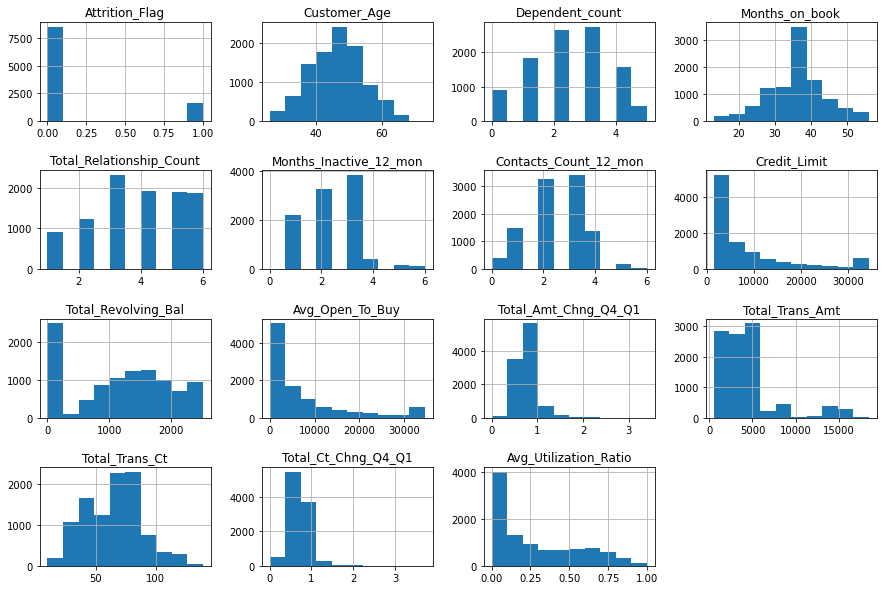

In [45]:
#Calling `hist` method to plot histograms of each of the numeric features for data bank
bank.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)
plt.show()

This feature distribution also shows the outliers for the features we talked before.

#### Dealing with Outliers

In [48]:
bank.quantile([.25,.5, .75, .90, .95, .99, 1]).T

,0.25,0.50,0.75,0.90,0.95,0.99,1.00
Attrition_Flag,0.000,0.000,0.000,1.0000,1.000,1.00000,1.000
Customer_Age,41.000,46.000,52.000,57.0000,60.000,65.00000,73.000
Dependent_count,1.000,2.000,3.000,4.0000,4.000,5.00000,5.000
Months_on_book,31.000,36.000,40.000,46.0000,50.000,56.00000,56.000
Total_Relationship_Count,3.000,4.000,5.000,6.0000,6.000,6.00000,6.000
Months_Inactive_12_mon,2.000,2.000,3.000,3.0000,4.000,6.00000,6.000
Contacts_Count_12_mon,2.000,2.000,3.000,4.0000,4.000,5.00000,6.000
Credit_Limit,2555.000,4549.000,11067.500,23400.2000,34516.000,34516.00000,34516.000
Total_Revolving_Bal,359.000,1276.000,1784.000,2228.4000,2517.000,2517.00000,2517.000
Avg_Open_To_Buy,1324.500,3474.000,9859.000,21964.6000,32183.400,34294.14000,34516.000


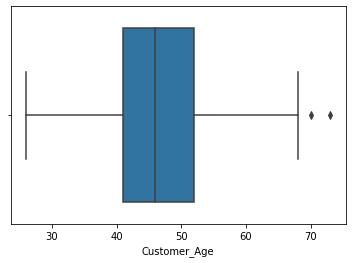

In [50]:
sns.boxplot(x=bank['Customer_Age'])
plt.show()

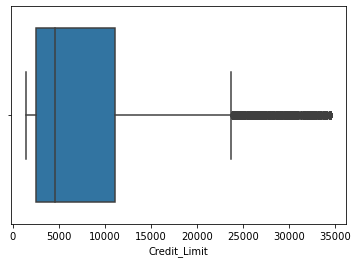

In [52]:
sns.boxplot(x=bank['Credit_Limit'])
plt.show()

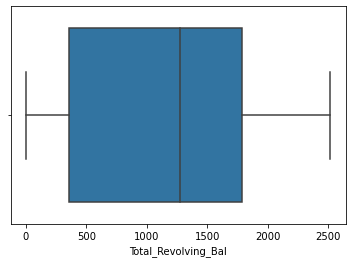

In [54]:
sns.boxplot(x=bank['Total_Revolving_Bal'])
plt.show()

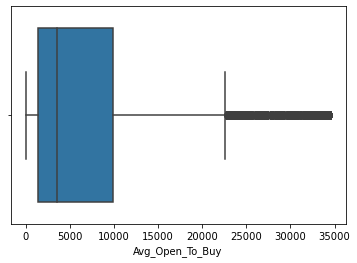

In [56]:
sns.boxplot(x=bank['Avg_Open_To_Buy'])
plt.show()

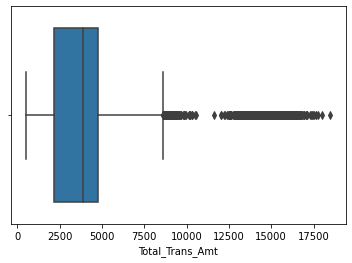

In [58]:
sns.boxplot(x=bank['Total_Trans_Amt'])
plt.show()

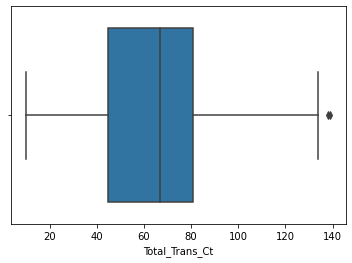

In [60]:
sns.boxplot(x=bank['Total_Trans_Ct'])
plt.show()

There is big issue with 'Credit_Limit', 'Avg_Open_To_Buy'and 'Total_Trans_Amt'.

In [62]:
# Calculating outlier
Q1 = bank.quantile(0.25)
Q3 = bank.quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR
upper_bound

Attrition_Flag                  0.000
Customer_Age                   68.500
Dependent_count                 6.000
Months_on_book                 53.500
Total_Relationship_Count        8.000
Months_Inactive_12_mon          4.500
Contacts_Count_12_mon           4.500
Credit_Limit                23836.250
Total_Revolving_Bal          3921.500
Avg_Open_To_Buy             22660.750
Total_Amt_Chng_Q4_Q1            1.201
Total_Trans_Amt              8619.250
Total_Trans_Ct                135.000
Total_Ct_Chng_Q4_Q1             1.172
Avg_Utilization_Ratio           1.223
dtype: float64

In [64]:
print(bank[bank.Customer_Age > 68.5])

           Attrition_Flag  Customer_Age Gender  Dependent_count  \
CLIENTNUM                                                         
715952883               0            73      M                0   
787348608               0            70      M                0   

          Education_Level Marital_Status Income_Category Card_Category  \
CLIENTNUM                                                                
715952883     High School        Married     $40K - $60K          Blue   
787348608     High School        Married  Less than $40K          Blue   

           Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
CLIENTNUM                                                                     
715952883              36                         5                       3   
787348608              56                         3                       2   

           Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
CLIENTNUM                                     

In [66]:
print(bank[bank.Credit_Limit >  23836.250])

           Attrition_Flag  Customer_Age Gender  Dependent_count  \
CLIENTNUM                                                         
810347208               0            51      M                4   
818906208               0            32      M                0   
709967358               0            48      M                4   
827111283               0            45      M                3   
712661433               0            49      M                4   
...                   ...           ...    ...              ...   
716644008               1            55      M                3   
719848008               0            39      M                2   
715474083               0            51      M                3   
718225683               0            56      M                1   
708564858               1            33      M                2   

          Education_Level Marital_Status Income_Category Card_Category  \
CLIENTNUM                                             

In [67]:
print(bank[bank.Avg_Open_To_Buy >  22660.750])

           Attrition_Flag  Customer_Age Gender  Dependent_count  \
CLIENTNUM                                                         
810347208               0            51      M                4   
818906208               0            32      M                0   
709967358               0            48      M                4   
827111283               0            45      M                3   
712661433               0            49      M                4   
...                   ...           ...    ...              ...   
719848008               0            39      M                2   
717185658               1            51      M                1   
715474083               0            51      M                3   
718225683               0            56      M                1   
708564858               1            33      M                2   

          Education_Level Marital_Status Income_Category Card_Category  \
CLIENTNUM                                             

In [68]:
print(bank[bank.Total_Trans_Amt >  8619.250])

           Attrition_Flag  Customer_Age Gender  Dependent_count  \
CLIENTNUM                                                         
772313358               0            50      M                3   
785515533               0            43      F                2   
771719283               0            39      F                4   
712266633               0            51      F                2   
758211483               0            45      M                5   
...                   ...           ...    ...              ...   
713899383               0            56      F                1   
772366833               0            50      M                2   
710638233               1            41      M                2   
716506083               1            44      F                1   
714337233               1            43      F                2   

          Education_Level Marital_Status Income_Category Card_Category  \
CLIENTNUM                                             

|Features | Count of Outliers|
|---------|-----------------|
|Customer_Age| 2|
|Credit_Limit|984|
|Avg_Open_To_Buy|963|
|Total_Trans_Amt|896|
|Total_Trans_Ct|1|

In [69]:
type(bank.quantile(.99))

pandas.core.series.Series

In [70]:
type(upper_bound)

pandas.core.series.Series

In [74]:
compare=pd.DataFrame({'Upper_Bound': upper_bound, '99th_Percentile': bank.quantile(0.99)})
compare

,Upper_Bound,99th_Percentile
Attrition_Flag,0.000,1.00000
Customer_Age,68.500,65.00000
Dependent_count,6.000,5.00000
Months_on_book,53.500,56.00000
Total_Relationship_Count,8.000,6.00000
Months_Inactive_12_mon,4.500,6.00000
Contacts_Count_12_mon,4.500,5.00000
Credit_Limit,23836.250,34516.00000
Total_Revolving_Bal,3921.500,2517.00000
Avg_Open_To_Buy,22660.750,34294.14000


In [75]:
bank.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,0,40,F,4,High School,Married,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [76]:
bank.shape

(10127, 20)

In [77]:
# save the data to a new csv file
bank.to_csv('bank_cleaned_with_outliers.csv')

#### Replacing the outliers

In [78]:
# Replacing 'Customer_Age' > 68 by 68
bank['Customer_Age'] = np.where(bank['Customer_Age'] > 68, 65, bank['Customer_Age'])
# Replacing 'Credit_Limit' > 23836 by 23836
bank['Credit_Limit'] = np.where(bank['Credit_Limit'] > 23836, 23836, bank['Credit_Limit'])
# Replacing 'Avg_Open_To_Buy' >22660 by 22660
bank['Avg_Open_To_Buy'] = np.where(bank['Avg_Open_To_Buy'] > 22660, 22660, bank['Avg_Open_To_Buy'])
# Replacing 'Total_Trans_Amt' > 8619 by 8619
bank['Total_Trans_Amt'] = np.where(bank['Total_Trans_Amt'] > 8619, 8619, bank['Total_Trans_Amt'])
# Replacing 'Customer_Age' > 135 by 123
bank['Total_Trans_Ct'] = np.where(bank['Total_Trans_Ct'] > 135, 123, bank['Total_Trans_Ct'])


In [80]:
bank.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,0,40,F,4,High School,Married,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


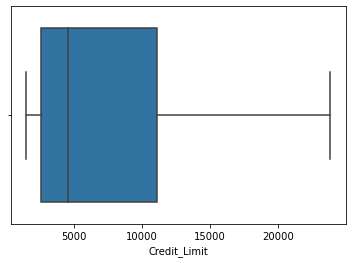

In [81]:
sns.boxplot(x=bank['Credit_Limit'])
plt.show()

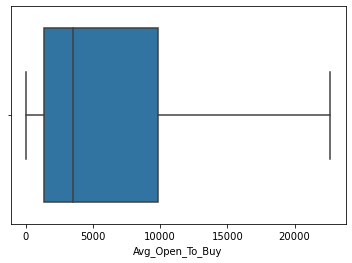

In [82]:
sns.boxplot(x=bank['Avg_Open_To_Buy'])
plt.show()

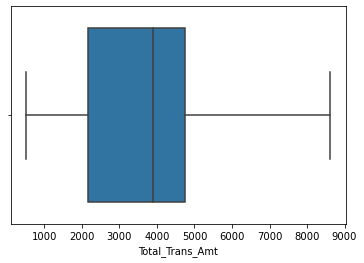

In [84]:
sns.boxplot(x=bank['Total_Trans_Amt'])
plt.show()

##### Looks good.

#### Saving the final data

In [85]:
# save the data to a new csv file
bank.to_csv('bank_cleaned_without_outliers.csv')